<a href="https://colab.research.google.com/github/wayoo2019/Time-Series-analysis/blob/main/475_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount Google Drive to import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import time
import datetime

import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Question 1

In [ ]:
%%time
measurement = pd.read_excel("/content/drive/MyDrive/475 Time Series/hw2/MeasurementData_Q1.xlsx")

CPU times: user 8.02 ms, sys: 90 µs, total: 8.11 ms
Wall time: 14.1 ms


Smoothing data 

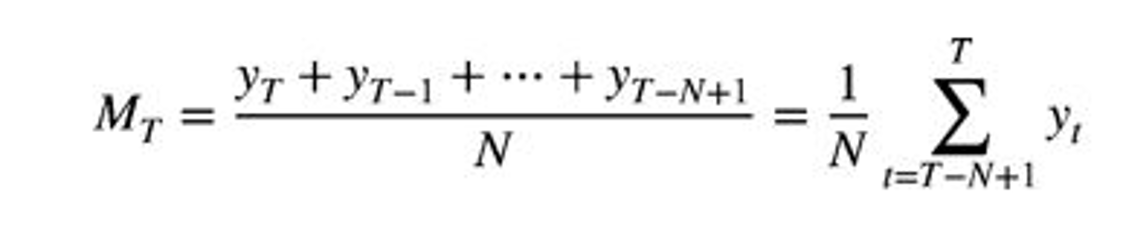

In [ ]:
# Define simple moving average function accordingly

def moving_average(pandas_series, window):

  sma = np.cumsum(list(pandas_series))
  sma[window:] = sma[window:] - sma[:-window]
  sma[window - 1:] = sma[window - 1:] / window
  sma[0: window -1] = np.nan # beginning window-1 are null
  return sma


In [ ]:
#Q1a
measurement['SMA_11'] = moving_average(list(measurement['Measurement']), window=11)
#Q1b 
measurement['SMA_5'] = moving_average(list(measurement['Measurement']), window=5)

###Q1a

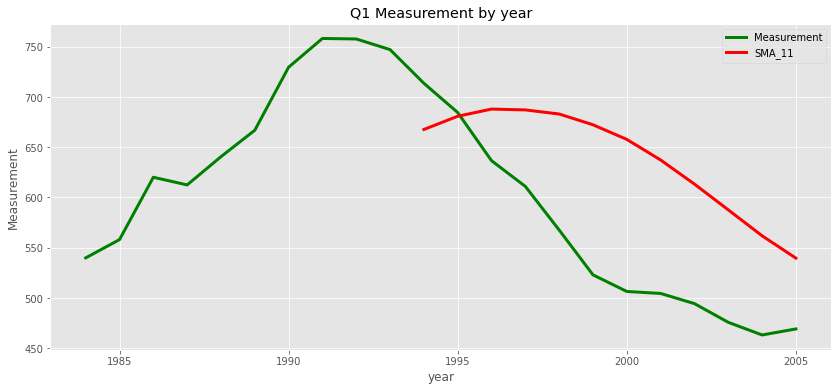

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.lineplot(x="Year", y="Measurement", data=measurement, linewidth=3, color='green' )

ax1.set_title("Q1 Measurement by year")
ax1.set_xlabel("year")
ax1.set_ylabel("Measurement")

sns.lineplot(x="Year", y="SMA_11", data=measurement, linewidth=3, color='red')

ax1.legend(['Measurement', 'SMA_11']);

plt.show()

###Q1b

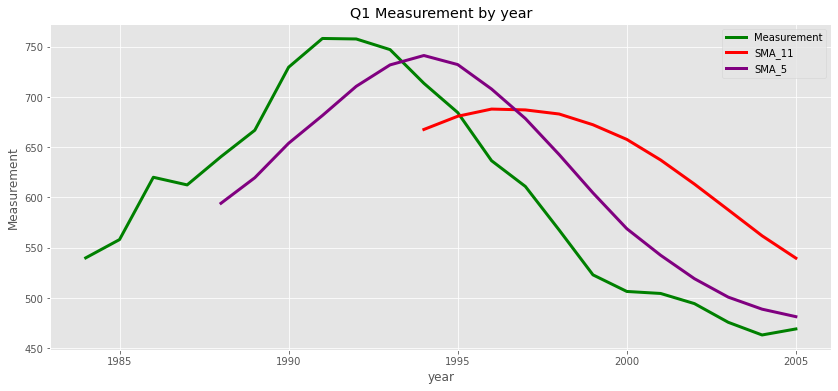

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.lineplot(x="Year", y="Measurement", data=measurement, linewidth=3, color='green' )

ax1.set_title("Q1 Measurement by year")
ax1.set_xlabel("year")
ax1.set_ylabel("Measurement")

sns.lineplot(x="Year", y="SMA_11", data=measurement, linewidth=3, color='red')

sns.lineplot(x="Year", y="SMA_5", data=measurement,linewidth=3, color='purple')

ax1.legend(['Measurement', 'SMA_11', 'SMA_5']);

plt.show()


###Q1c:

By modifing the span (length) of the simple moving average window, period=5 captures the trend of original data trend better than period=10

## Question 2

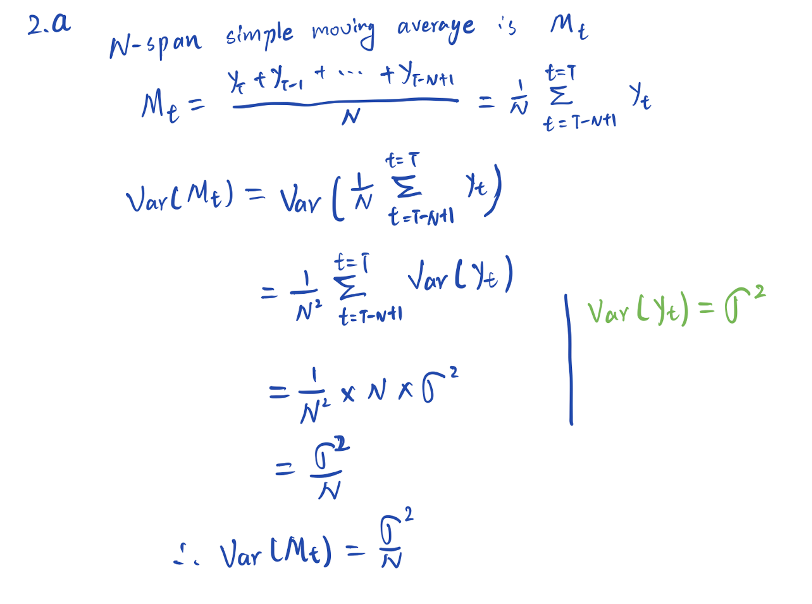

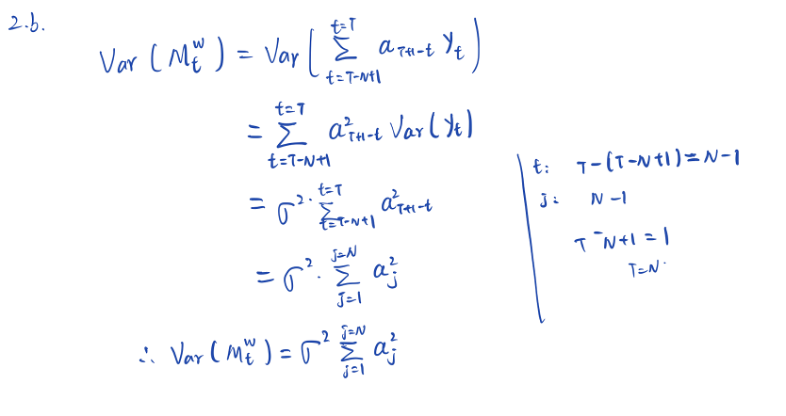

In [ ]:
%%time
yd = pd.read_excel("/content/drive/MyDrive/475 Time Series/hw2/Yield_Data.xlsx")

CPU times: user 11.3 ms, sys: 3.37 ms, total: 14.7 ms
Wall time: 521 ms


Define the Simple Exponential smoothing function accordingly

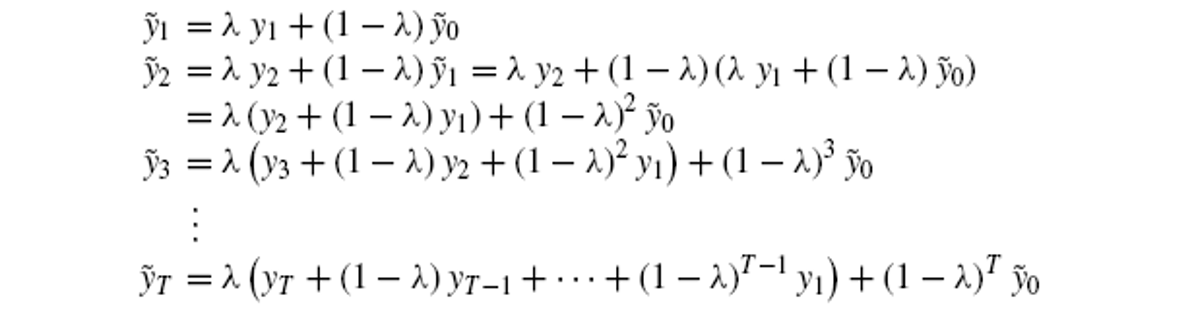

In [ ]:
#define the Simple Exponential smoothing function accordingly
def sim_exp_smooth(pandas_series, lambda_value):

    results = np.zeros_like(pandas_series)

    results[0] = pandas_series[0] # initial the tilde_y0 == y0
    for t in range(1, pandas_series.shape[0]):
        results[t] = lambda_value * pandas_series[t] + (1 - lambda_value) * results[t - 1]

    return results

In [ ]:
#Q3a lambda=0.2
yd['SES_0.2'] = sim_exp_smooth(yd['Yield, %'], 0.2)
#Q3b lambda=0.8
yd['SES_0.8'] = sim_exp_smooth(yd['Yield, %'], 0.8)

###Q3a

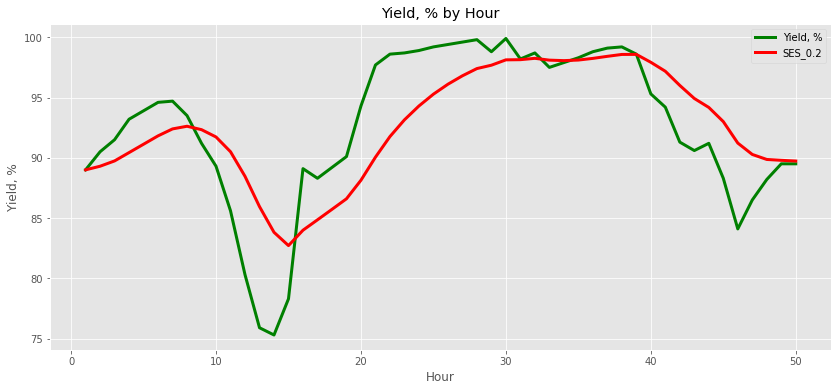

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.lineplot(x="Hour", y="Yield, %", data=yd, linewidth=3, color='green' )

ax1.set_title("Yield, % by Hour")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Yield, %")

sns.lineplot(x="Hour", y="SES_0.2", data=yd, linewidth=3, color='red')

ax1.legend(['Yield, %', 'SES_0.2']);

plt.show()

###Q3b

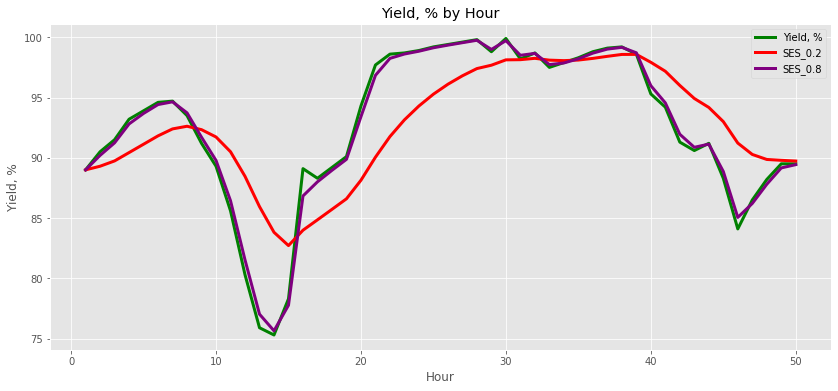

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.lineplot(x="Hour", y="Yield, %", data=yd, linewidth=3, color='green' )

ax1.set_title("Yield, % by Hour")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Yield, %")

sns.lineplot(x="Hour", y="SES_0.2", data=yd, linewidth=3, color='red')

sns.lineplot(x="Hour", y="SES_0.8", data=yd, linewidth=3, color='purple')

ax1.legend(['Yield, %', 'SES_0.2', 'SES_0.8']);

plt.show()

###Q3c

In [ ]:
from sklearn.metrics import mean_squared_error

print('lambda = 0.2 mean squre difference:', format(mean_squared_error(yd['Yield, %'], yd['SES_0.2'])))
print('lambda = 0.8 mean squre difference: ', mean_squared_error(yd['Yield, %'], yd['SES_0.8']))

lambda = 0.2 mean squre difference: 15.671048945737011
lambda = 0.8 mean squre difference:  0.2950579416051249


Based on the result from above calculation, lambda = 0.8 produced a lower error.

